
# Blog GAT : https://petar-v.com/GAT/

CNN đã được sử dụng rất phổ biến trong việc sử lý hình ảnh
Deep Learning đã cho thấy thành công của CNN trên xử lý ảnh

Những lợi ích của việc sử dụng CNN trong đồ thị

* Computational and storage efficiency (requiring no more than O(V + E) time and memory);
* Fixed number of parameters (independent of input graph size);
* Localisation (acting on a local neighbourhood of a node);
* Ability to specify arbitrary importances to different neighbours;
* Applicability to inductive problems (arbitrary, unseen graph structures).

Tính toán và lưu trữ hiệu quả (yêu cầu không hơn O(V + E)
Fixed số lượng tham số (độc lập với kích thước đồ thị)
Localisation (bản địa hóa) (hành động ở một node hàng xóm như là một node)
Có khả năng cụ thể hóa tùy ý quan trọng theo những hàng xóm khác nhau
Có thể áp dụng qui nạp - nghĩa là có thể áp dụng cái nào cũng như nhau và tương ứng với những đồ thị không rõ cấu trúc hoặc tùy ý

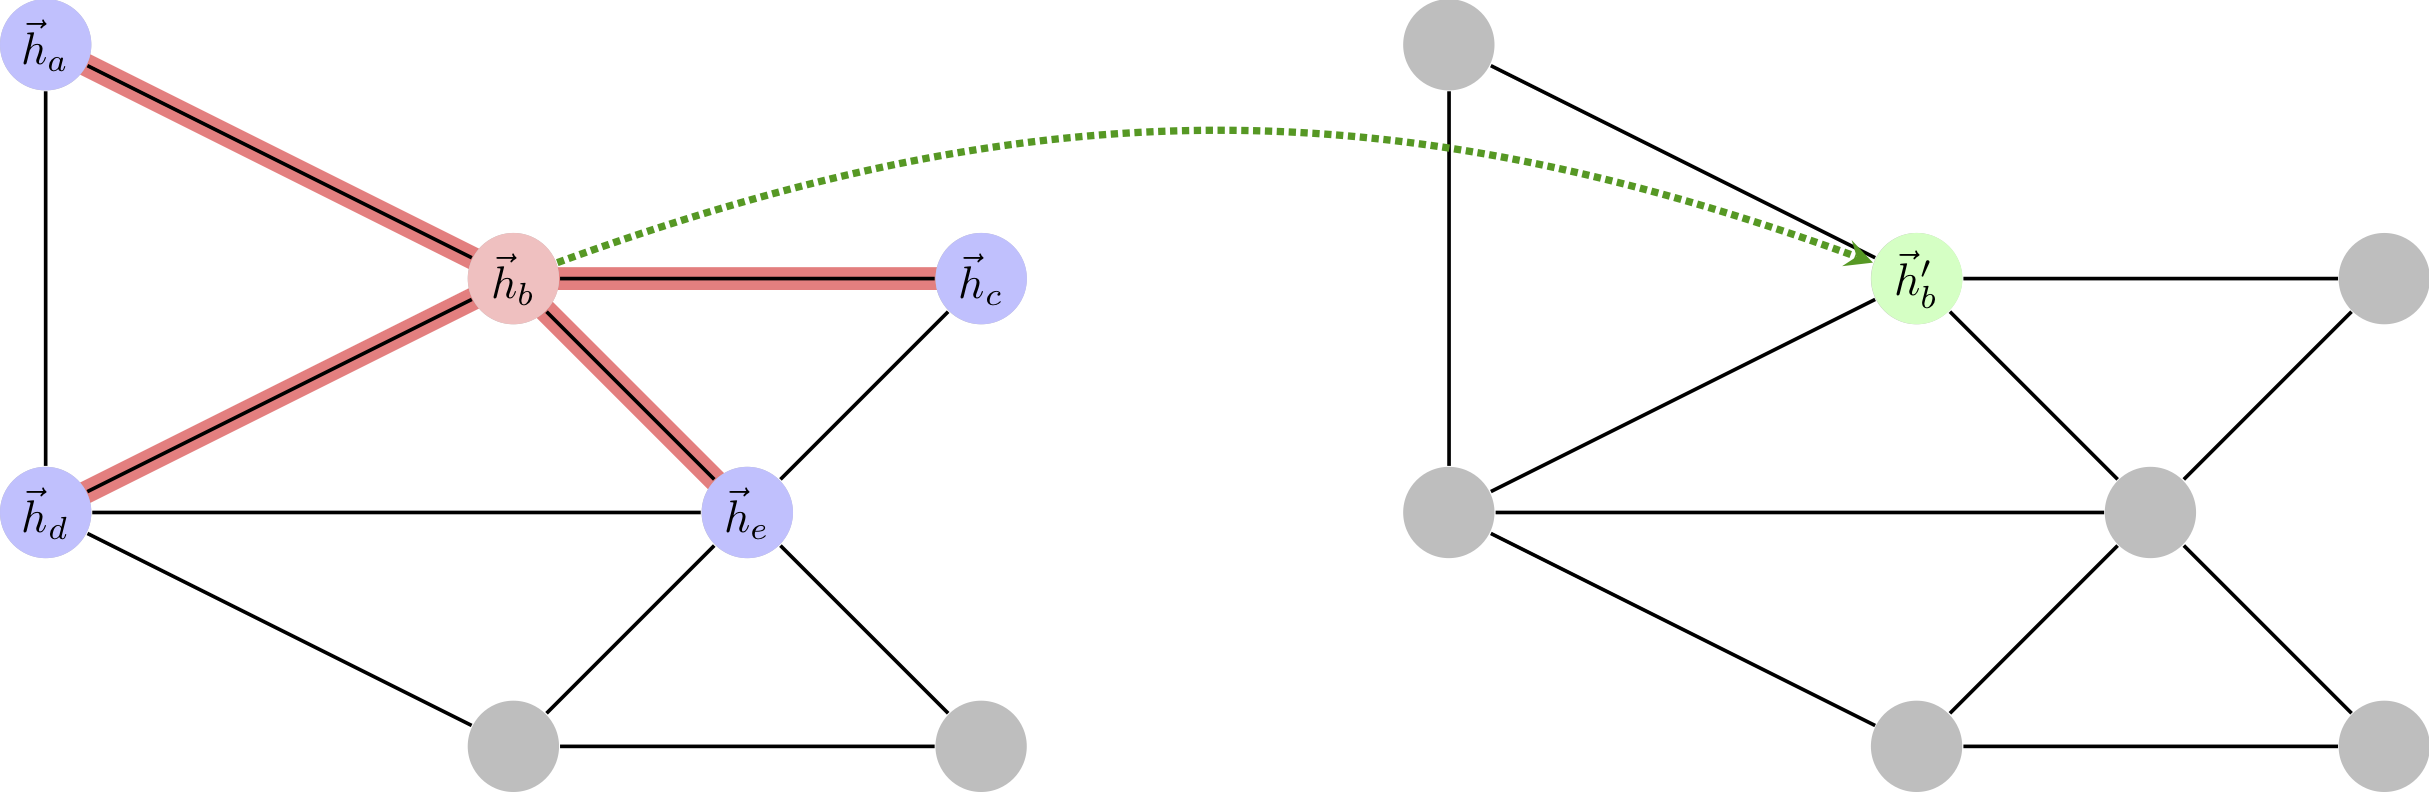

In [6]:
from IPython.display import Image
Image(filename="../images/gat/gat_desir.png")

### Properties

* Computationally efficient: the computation of attentional coefficients can be parallelised across all edges of the graph, and the aggregation may be parallelised across all nodes;

* Storage efficient: It is possible to implement a GAT layer using sparse matrix operations only, requiring no more than $O(V + E)$ entries to be stored anywhere;

* Fixed number of parameters, irrespective of the graph’s node or edge count;

* Trivially localised, as we only attend over neighbourhoods;

* Allows for (implicitly) specifying different importances to different neighbours;

* Readily applicable to inductive problems, as it is a shared edge-wise mechanism and therefore does not depend on the global graph structure!

* Có thể tính toán song song trong đồ thị nên nhanh

* Lưu trữ hiệu quả : Cài đặt GAT layer có thể chỉ cần sử dụng sparse matrix, không yêu cầu hơn $O(V + E)$ thực thể để lưu trữ

* Fix số lượng tham số

* Trivially localised (Địa phương hóa)

* Cho phép (ngần hiểu) cụ thể hóa những cái quan trọng khác nhau cho những hàng xóm khác nhau

* Không phụ thuộc vào cấu trúc graph toàn cục


### Towards a viable graph convolution

Consider a graph of $n$ nodes, specified as a set of node features, $(\vec{h_1}, \vec{h_2}, ...\vec{h_n})$, and an adjacency matrix $A$, such that $A_{ij} = 1$ if $i$ and $j$ are connected, and 0 otherwise 1. A graph convolutional layer then computes a set of new node features,$(\vec{h'_1}, \vec{h'_2}, ...\vec{h'_n})$ , based on the input features as well as the graph structure.

Every graph convolutional layer starts off with a shared node-wise feature transformation (in order to achieve a higher-level representation), specified by a weight matrix $W $ This transforms the feature vectors into $\vec{g_i} = {W} \vec{h}_i$. After this, the vectors $\vec{g}_i$ are typically recombined in some way at each node.

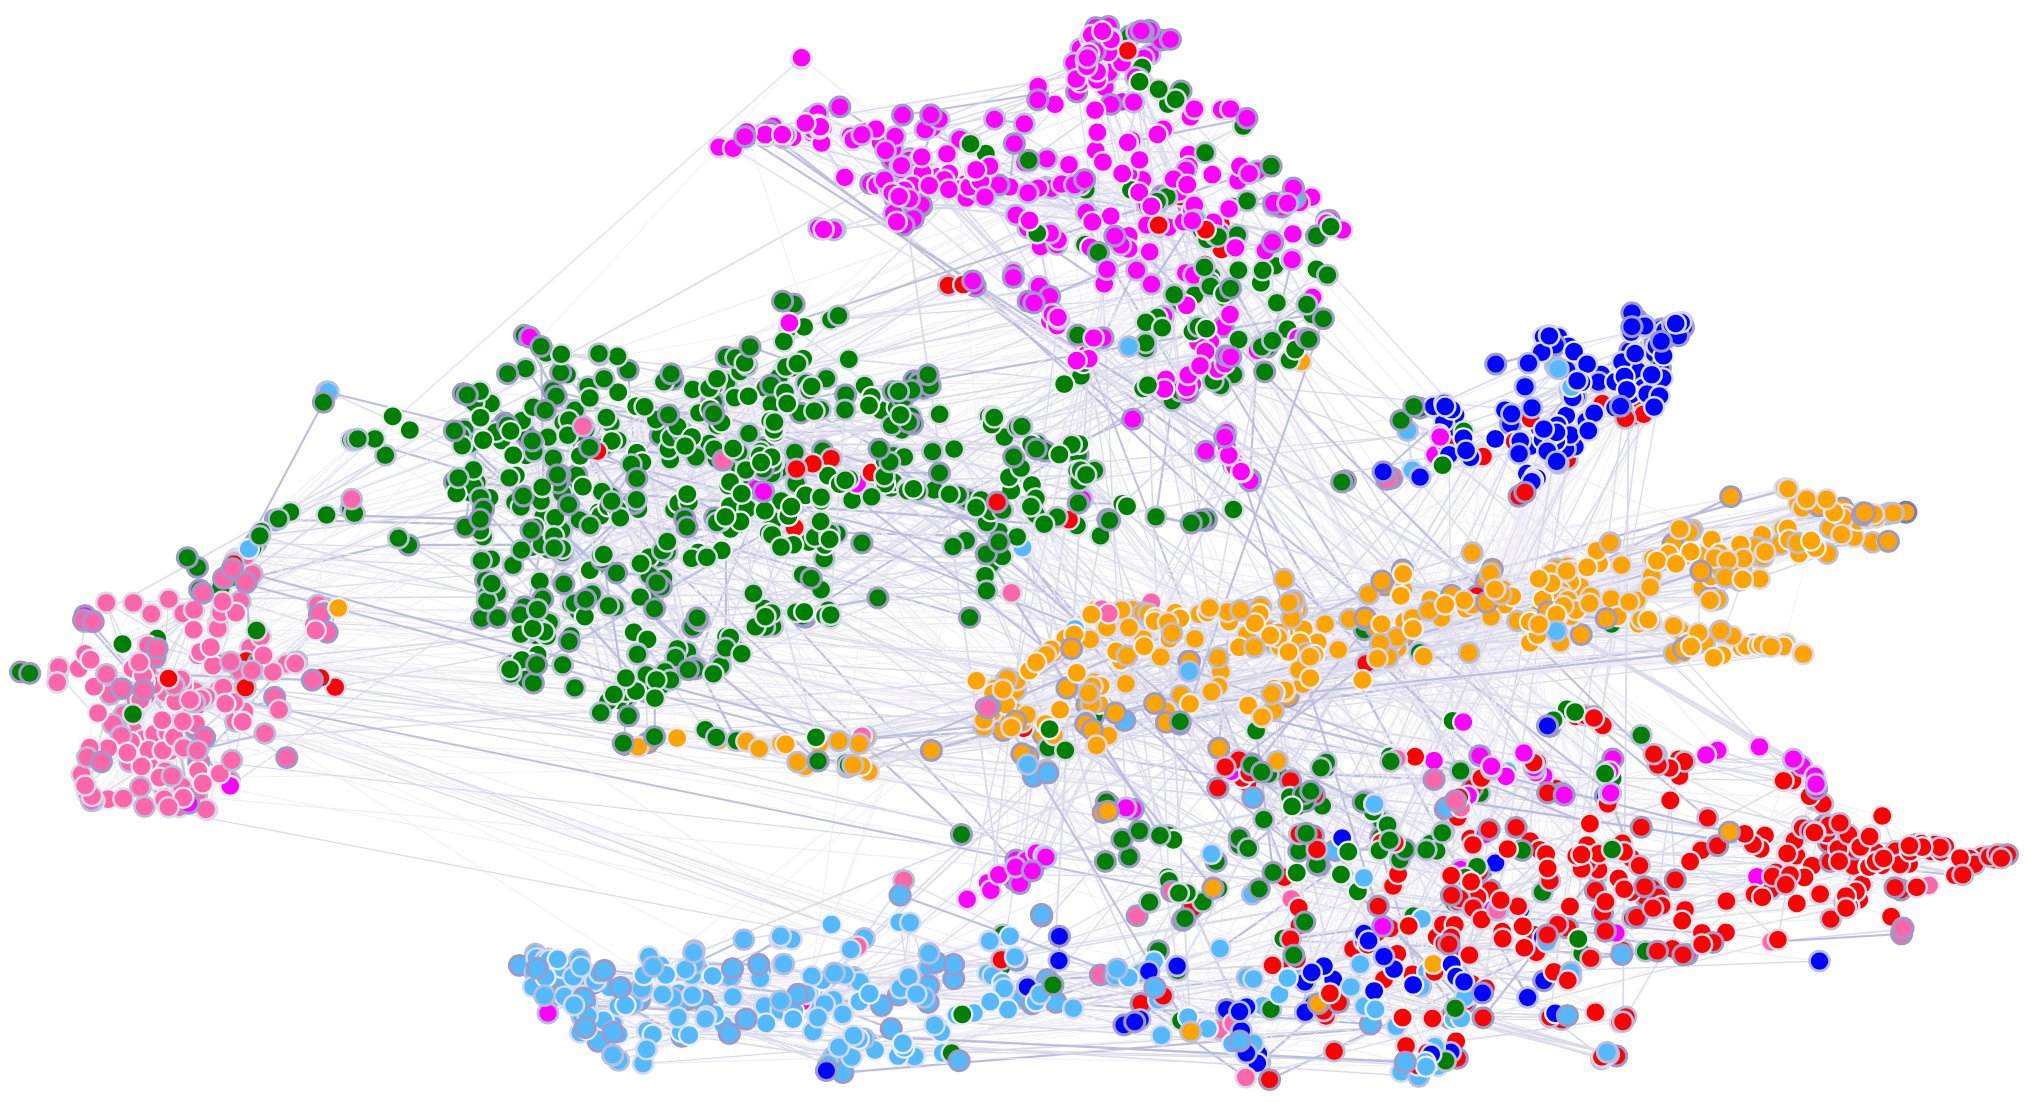

In [7]:
Image(filename="../images/gat/gat_sne.jpg")

# Learning Attention-based Embeddings for Relation Prediction in Knowledge Graphs

Blog Tác giả : https://deepakn97.github.io/blog/2019/Knowledge-Base-Relation-Prediction/



# Graph Attention Networks

Paper : https://arxiv.org/pdf/1710.10903.pdf

Code : https://mc.ai/an-introduction-to-graph-attention-networks/

#### GAT ARCHITECTURE
##### 2.1 GRAPH ATTENTIONAL LAYER

We will start by describing a single graph attentional layer, as the sole layer utilized throughout
all of the GAT architectures used in our experiments. The particular attentional setup utilized by us
closely follows the work of Bahdanau et al. (2015)—but the framework is agnostic to the particular
choice of attention mechanism.

The input to our layer is a set of node features, $h = \{\vec{h_1},\vec{h_2},...,\vec{h_N}\},\vec{h_i} ∈ R^F$ , where $ N $ is the number of nodes, and $F$ is the number of features in each node. The layer produces a new set of node features (of potentially different cardinality $F'$), $h' = \{\vec{h}'_1,\vec{h}'_2,...,\vec{h'}_N\},\vec{h'}_i ∈ R^{F'}$, as its output

Chúng ta bắt đầu bằng mô tả một **single graph attentional layer**(lớp đơn đồ thị chú ý), như là một lớp so le tận dụng thông qua tất cả cấu trúc GAT sử dụng trong thực nghiệm của chúng tôi. Cụ thể attentional cài đặt một tận dụng sử dụng bởi chúng ta gần với công việc của Bahdanau nhưng framework thì agnostic(bất khả tri) để đặc biệt chọn cho cơ chế attention (chú ý)

Đầuv vào là một tập hợp node đặc trưng :
$h = \{\vec{h_1},\vec{h_2},...,\vec{h_N}\},\vec{h_i} ∈ R^F$
với $N$ là số lượng node, $F$ là số lượng đặc trưng của mỗi node. 

Layer tạo ra một tập hợp đặc trưng mới (với đặc trưng cốt yếu khác nhau F'), $h' = \{\vec{h}'_1,\vec{h}'_2,...,\vec{h'}_N\},\vec{h'}_i ∈ \mathbb{R}^{F'}$ là out put

**Tóm lại :**

Đầu vào là vector $\vec{h}_i$ đầu ra là $\vec{h'}_i$ với $F$ là các đặc trưng, $\mathbb{N}$ là số lượng node

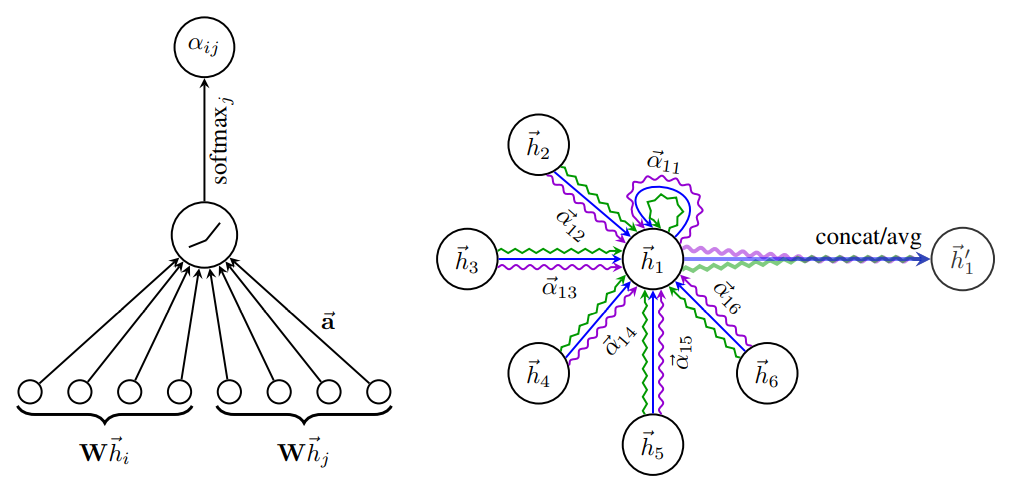

In [28]:
Image("../images/gat/gat_f1.png")

In order to obtain sufficient expressive power to transform the input features into higher-level features, at least one learnable linear transformation is required. To that end, as an initial step, a shared linear transformation, parametrized by a *weight matrix* , $W ∈ \mathbb{R}^{F' \times F}$ , is applied to every node. We then perform self-attention on the nodes—a shared attentional mechanism 
$a : \mathbb{R}^{F'} \times \mathbb{R}^{F'} \to \mathbb{R}$
computes *attention coefficients*

$$
e_{ij} - a(W \vec{h}_i, W \vec{h}_j)
$$

that indicate the *importance* of node $j$’s features to node $i$. In its most general formulation, the model allows every node to attend on every other node, dropping all structural information. We inject the graph structure into the mechanism by performing masked attention—we only compute $e_{ij}$ for nodes $j ∈ \mathcal{N}_i$, where $\mathcal{N}_i$ is some neighborhood of node $i$ in the graph. In all our experiments, these will be exactly the first-order neighbors of $i$ (including $i$). To make coefficients easily comparable across different nodes, we normalize them across all choices of $j$ using the softmax function:

$$
\alpha_{ij} = \text{softmax}_j(e_{ij}) = \frac{\text{exp}(e_{ij})}{\sum_{k\in \mathcal{N}_i}{\text{exp}(e_{ik})}}.
$$

In our experiments, the attention mechanism $a$ is a single-layer feedforward neural network, parametrized by a weight vector $\vec{a} ∈ \mathbb{R}^{2F'}$, and applying the LeakyReLU nonlinearity (with negative input slope $\alpha = 0.2$). Fully expanded out, the coefficients computed by the attention mechanism (illustrated by Figure 1 (left)) may then be expressed as:

$$
        \alpha_{ij} = \frac{\text{exp}(LeakyReLU(\vec{a}^{T} [W \vec{h}_i] \| W \vec{h}_j]))}{\sum_{k\in \mathcal{N}_i}{\text{exp}(LeakyReLU(\vec{a}^{T} [W \vec{h}_i] \| W \vec{h}_j])}}.
$$

Để mà chứa expressive power(sức mạnh biểu cảm) hiệu quả để transform đặc trưng đầu vào thành đặc trưng higher-level, ít nhất thì linear transform là yêu cầu. Để kết thúc đó, một bước khởi tạo, một sự chia sẻ chuyển đổi tuyến tính (shared linear transformation), tham số hóa bởi một ma trận trọng số  $W ∈ \mathbb{R}^{F' \times F}$ được áp dụng với mỗi node. Chúng tôi sau đó thực hiện self-attention (tự chú ý) trên nodes một cơ chế chia sẻ chú ý $a : \mathbb{R}^{F'} \times \mathbb{R}^{F'} \to \mathbb{R}$
tính toán *attention coefficients* (hệ số chú ý)

$$
e_{ij} - a(W \vec{h}_i, W \vec{h}_j)
$$

mà chỉ định tầm quan trọng của đặc trưng node j so với node i. Trong hầu hết 

# Introducing attention to GCN

The key difference between GAT and GCN is how the information from the one-hop neighborhood is aggregated.

For GCN, a graph convolution operation produces the normalized sum of the node features of neighbors.


$$h_i^{(l+1)}=\sigma\left(\sum_{j\in \mathcal{N}(i)} {\frac{1}{c_{ij}} W^{(l)}h^{(l)}_j}\right)$$

where $\mathcal{N}(i)$ is the set of its one-hop neighbors (to include
$v_i$ in the set, simply add a self-loop to each node),
$c_{ij}=\sqrt{|\mathcal{N}(i)|}\sqrt{|\mathcal{N}(j)|}$ is a
normalization constant based on graph structure, $\sigma$ is an
activation function (GCN uses ReLU), and $W^{(l)}$ is a shared
weight matrix for node-wise feature transformation. Another model proposed in
`GraphSAGE
<https://www-cs-faculty.stanford.edu/people/jure/pubs/graphsage-nips17.pdf>`_
employs the same update rule except that they set
:math:$c_{ij}=|\mathcal{N}(i)|$.

GAT introduces the attention mechanism as a substitute for the statically
normalized convolution operation. Below are the equations to compute the node
embedding $h_i^{(l+1)}$ of layer $l+1$ from the embeddings of
layer $l$.

.. image:: https://data.dgl.ai/tutorial/gat/gat.png
  :width: 450px
  :align: center

.. math::
$$
  \begin{align}
  z_i^{(l)}&=W^{(l)}h_i^{(l)},&(1) \\
  e_{ij}^{(l)}&=\text{LeakyReLU}(\vec a^{(l)^T}(z_i^{(l)}||z_j^{(l)})),&(2)\\
  \alpha_{ij}^{(l)}&=\frac{\exp(e_{ij}^{(l)})}{\sum_{k\in \mathcal{N}(i)}^{}\exp(e_{ik}^{(l)})},&(3)\\
  h_i^{(l+1)}&=\sigma\left(\sum_{j\in \mathcal{N}(i)} {\alpha^{(l)}_{ij} z^{(l)}_j }\right),&(4)
  \end{align}
$$

Explanations:


* Equation (1) is a linear transformation of the lower layer embedding :math:`h_i^{(l)}`
  and :math:`W^{(l)}` is its learnable weight matrix.
* Equation (2) computes a pair-wise *un-normalized* attention score between two neighbors.
  Here, it first concatenates the :math:`z` embeddings of the two nodes, where :math:`||`
  denotes concatenation, then takes a dot product of it and a learnable weight vector
  :math:`\vec a^{(l)}`, and applies a LeakyReLU in the end. This form of attention is
  usually called *additive attention*, contrast with the dot-product attention in the
  Transformer model.
* Equation (3) applies a softmax to normalize the attention scores on each node's
  incoming edges.
* Equation (4) is similar to GCN. The embeddings from neighbors are aggregated together,
  scaled by the attention scores.

There are other details from the paper, such as dropout and skip connections.
For the purpose of simplicity, those details are left out of this tutorial. To see more details, 
download the `full example <https://github.com/dmlc/dgl/blob/master/examples/pytorch/gat/gat.py>`_.
In its essence, GAT is just a different aggregation function with attention
over features of neighbors, instead of a simple mean aggregation.

GAT in DGL
-------------

DGL provides an off-the-shelf implementation of the GAT layer under the ``dgl.nn.<backend>``
subpackage. Simply import the ``GATConv`` as the follows.


3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


<module 'os' from 'E:\\ProgramFile\\Anaconda3\\lib\\os.py'>


In [5]:
import tensorflow as tf

NameError: name 'tf' is not defined

'1.5.1'